In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

#Q1 i
url = "https://github.com/ShoufaChen/COVID-19/raw/comp2501/csse_covid_19_data/csse_covid_19_daily_reports/"
#df = pd.read_csv("https://github.com/ShoufaChen/COVID-19/raw/comp2501/csse_covid_19_data/csse_covid_19_daily_reports/01-29-2020.csv"
#df
pat = r'\d\d-\d\d-2020.csv'
text = requests.get(url).text
soup = BeautifulSoup(text,'lxml')
alist = soup('a')
l = []
for i in alist:
  if i.has_attr('href'):
    l.append(i['href'])

l2 = []
for i in l:
  result = re.search(pat,i)
  if result != None:
    l2.append(result.group())

out_file_name = 'Covid19_HongKong.csv'

datas = []
for i in l2:
  df = pd.read_csv(url + i)
  hk_data = df[(df == 'Hong Kong').any(axis=1)]
  datas.append(hk_data)

In [2]:
#Q1 ii
import numpy as np
df = pd.concat(datas,ignore_index=True)
df = df.drop(columns='FIPS')
df = df.drop(columns='Admin2')
df['Province/State'] = df['Province/State'].replace(np.nan,'Hong Kong')
df['Country/Region'] = df['Country/Region'].replace(np.nan, 'Hong Kong')
df = df.drop(columns='Province_State')
df = df.drop(columns='Country_Region')

for i in range(345):
  if str(df.iloc[i]['Last Update']) == 'nan':
    df.loc[i,'Last Update'] = df.iloc[i]['Last_Update']
  if str(df.iloc[i]['Incidence_Rate']) == 'nan':
    df.loc[i,'Incidence_Rate'] = df.iloc[i]['Incident_Rate']
  if str(df.iloc[i]['Latitude']) == 'nan':
    df.loc[i,'Latitude'] = df.iloc[i]['Lat']
  if str(df.iloc[i]['Longitude']) == 'nan':
    df.loc[i,'Longitude'] = df.iloc[i]['Long_']
  if str(df.iloc[i]['Case-Fatality_Ratio']) == 'nan':
    df.loc[i,'Case-Fatality_Ratio'] = df.iloc[i]['Case_Fatality_Ratio']

df = df.drop(columns='Last_Update')
df = df.drop(columns='Incident_Rate')
df = df.drop(columns='Lat')
df = df.drop(columns='Long_')
df = df.drop(columns='Case_Fatality_Ratio')
df = df.drop(columns='Combined_Key')

df.to_csv(out_file_name)
df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active,Incidence_Rate,Case-Fatality_Ratio
0,Hong Kong,Hong Kong,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hong Kong,Hong Kong,1/23/20 17:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hong Kong,Hong Kong,1/24/20 17:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hong Kong,Hong Kong,1/25/20 17:00,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hong Kong,Hong Kong,1/26/20 16:00,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
340,Hong Kong,Hong Kong,2020-12-28 05:22:06,8610.0,137.0,7474.0,22.3,114.2,999.0,114.846122,1.591173
341,Hong Kong,Hong Kong,2020-12-29 05:22:37,8671.0,141.0,7526.0,22.3,114.2,1004.0,115.659782,1.626110
342,Hong Kong,Hong Kong,2020-12-30 05:22:34,8724.0,143.0,7616.0,22.3,114.2,965.0,116.366733,1.639156
343,Hong Kong,Hong Kong,2020-12-31 05:22:49,8778.0,147.0,7722.0,22.3,114.2,909.0,117.087022,1.674641


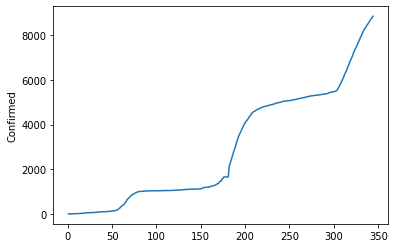

In [3]:
#Q1 iii
import seaborn as sns

df2 = pd.read_csv(out_file_name)
sns.lineplot(data=df2,x=df2.index,y='Confirmed')

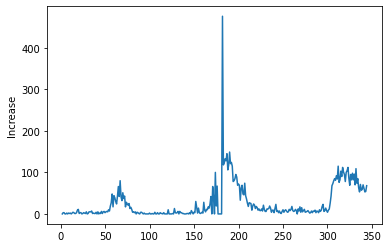

In [4]:
#Q1 iv
l = []
for i in range(1,345):
  l.append(df2.loc[i,'Confirmed'] - df2.loc[i - 1,'Confirmed'])
l.insert(0,np.nan)
df2.insert(12,'Increase',l)
sns.lineplot(data=df2,x=df2.index,y='Increase')